In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/penguins_size.csv')

In [4]:
df = df.dropna()
df.at[336, 'sex'] = 'FEMALE'

In [5]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier()

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
base_preds = model.predict(X_test)

In [14]:
base_preds

array(['Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie'

In [15]:
y_test

202    Chinstrap
315       Gentoo
141       Adelie
200    Chinstrap
299       Gentoo
         ...    
263       Gentoo
89        Adelie
210    Chinstrap
23        Adelie
317       Gentoo
Name: species, Length: 101, dtype: object

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [17]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [18]:
confusion_matrix(y_test, base_preds)

array([[41,  0,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

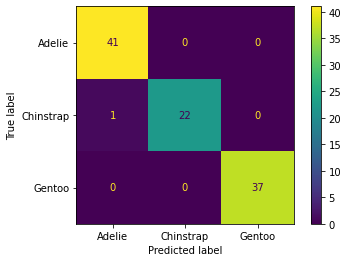

In [19]:
plot_confusion_matrix(model, X_test, y_test)

In [20]:
model.feature_importances_

array([0.33609286, 0.05366774, 0.53120101, 0.01085298, 0.0681854 ,
       0.        , 0.        ])

In [21]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [22]:
pd.DataFrame(index=X.columns, data=model.feature_importances_,
            columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.336093
culmen_depth_mm,0.053668
flipper_length_mm,0.531201
body_mass_g,0.010853
island_Dream,0.068185
island_Torgersen,0.000000
sex_MALE,0.000000


In [24]:
pd.DataFrame(index=X.columns, data=model.feature_importances_,
            columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
island_Torgersen,0.000000
sex_MALE,0.000000
body_mass_g,0.010853
culmen_depth_mm,0.053668
island_Dream,0.068185
culmen_length_mm,0.336093
flipper_length_mm,0.531201


In [25]:
from sklearn.tree import plot_tree

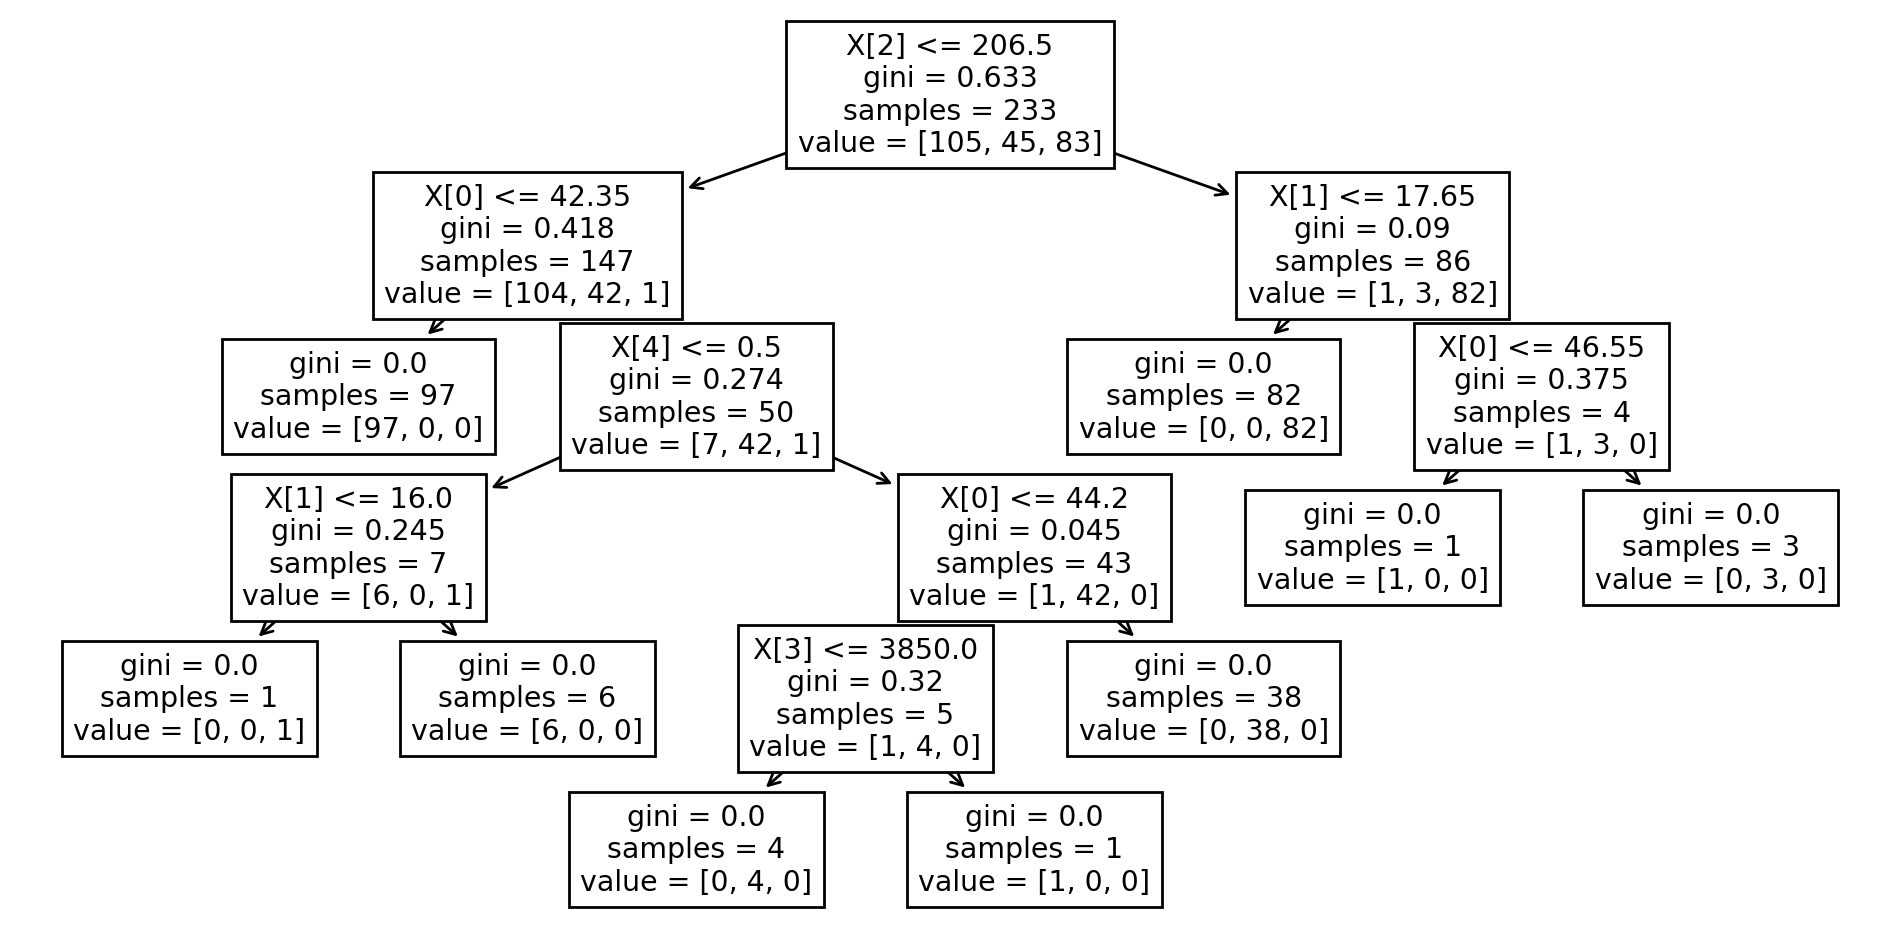

In [29]:
plt.figure(figsize=(12, 6), dpi=200)
plot_tree(model);

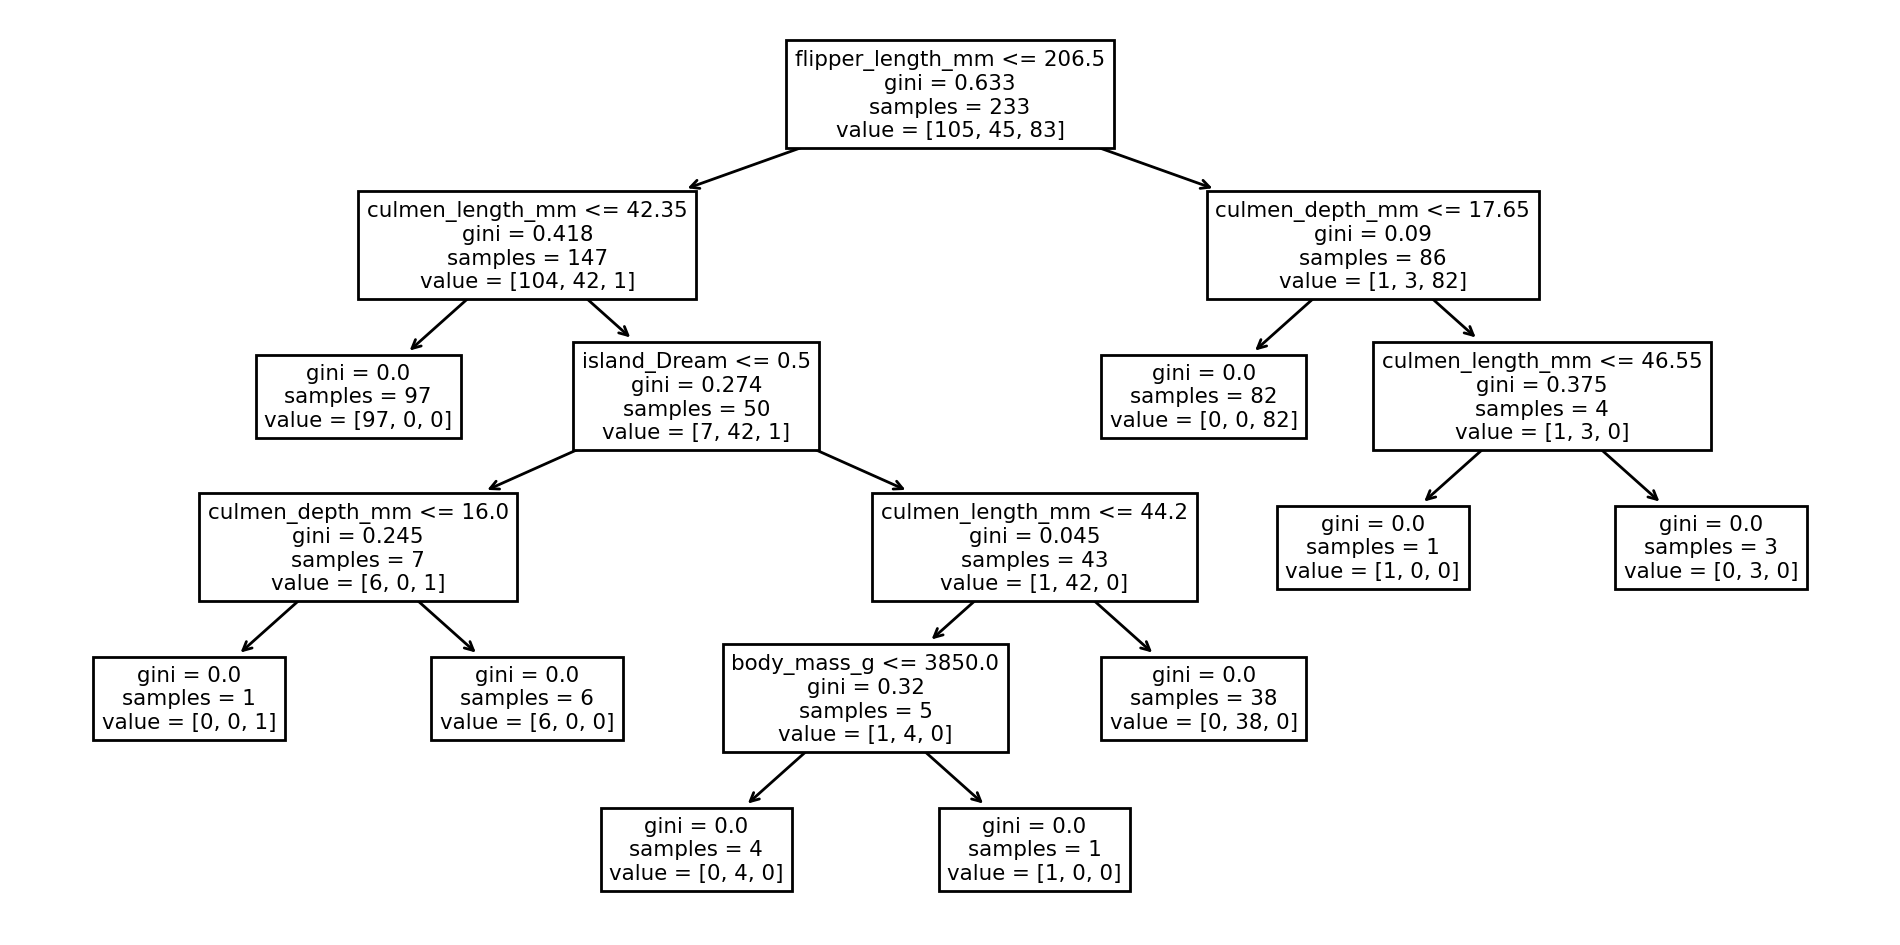

In [30]:
plt.figure(figsize=(12, 6), dpi=200)
plot_tree(model, feature_names=X.columns);

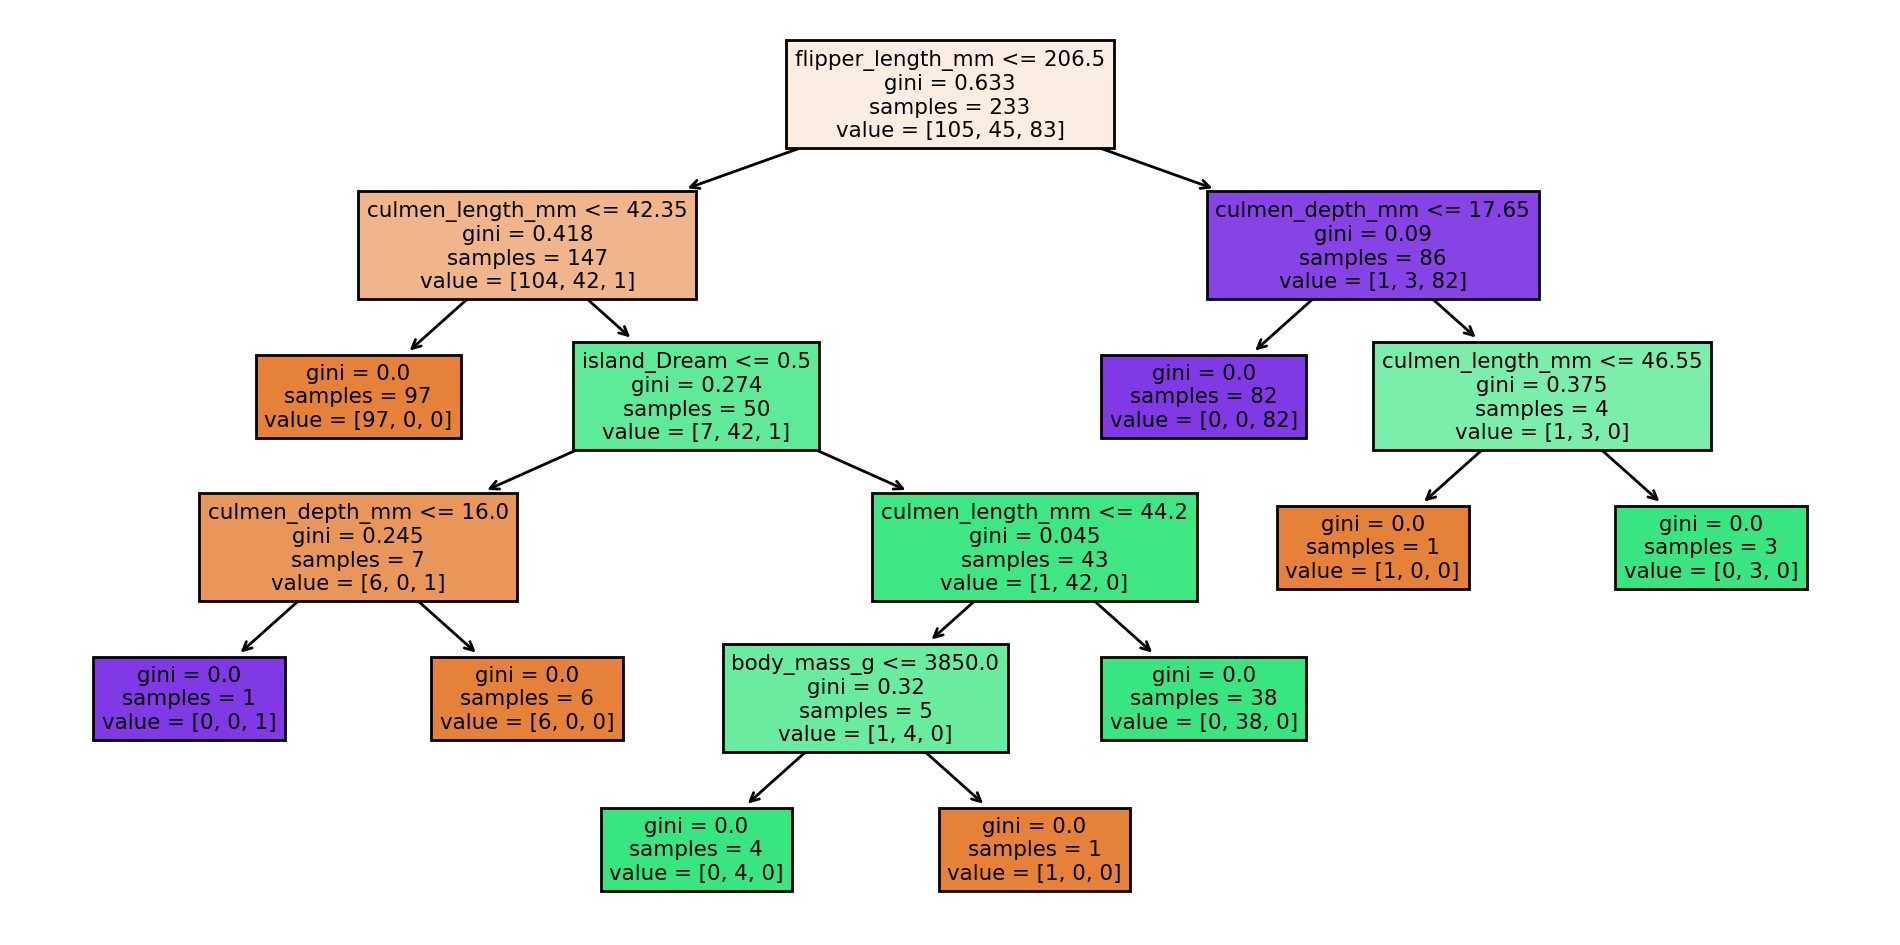

In [31]:
plt.figure(figsize=(12, 6), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

In [32]:
len(X_train)

233

In [33]:
def report_model(model):
    model_pred = model.predict(X_test)
    print(classification_report(y_test, model_pred))
    print('\n')
    
    plt.figure(figsize=(12, 6), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True);

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101





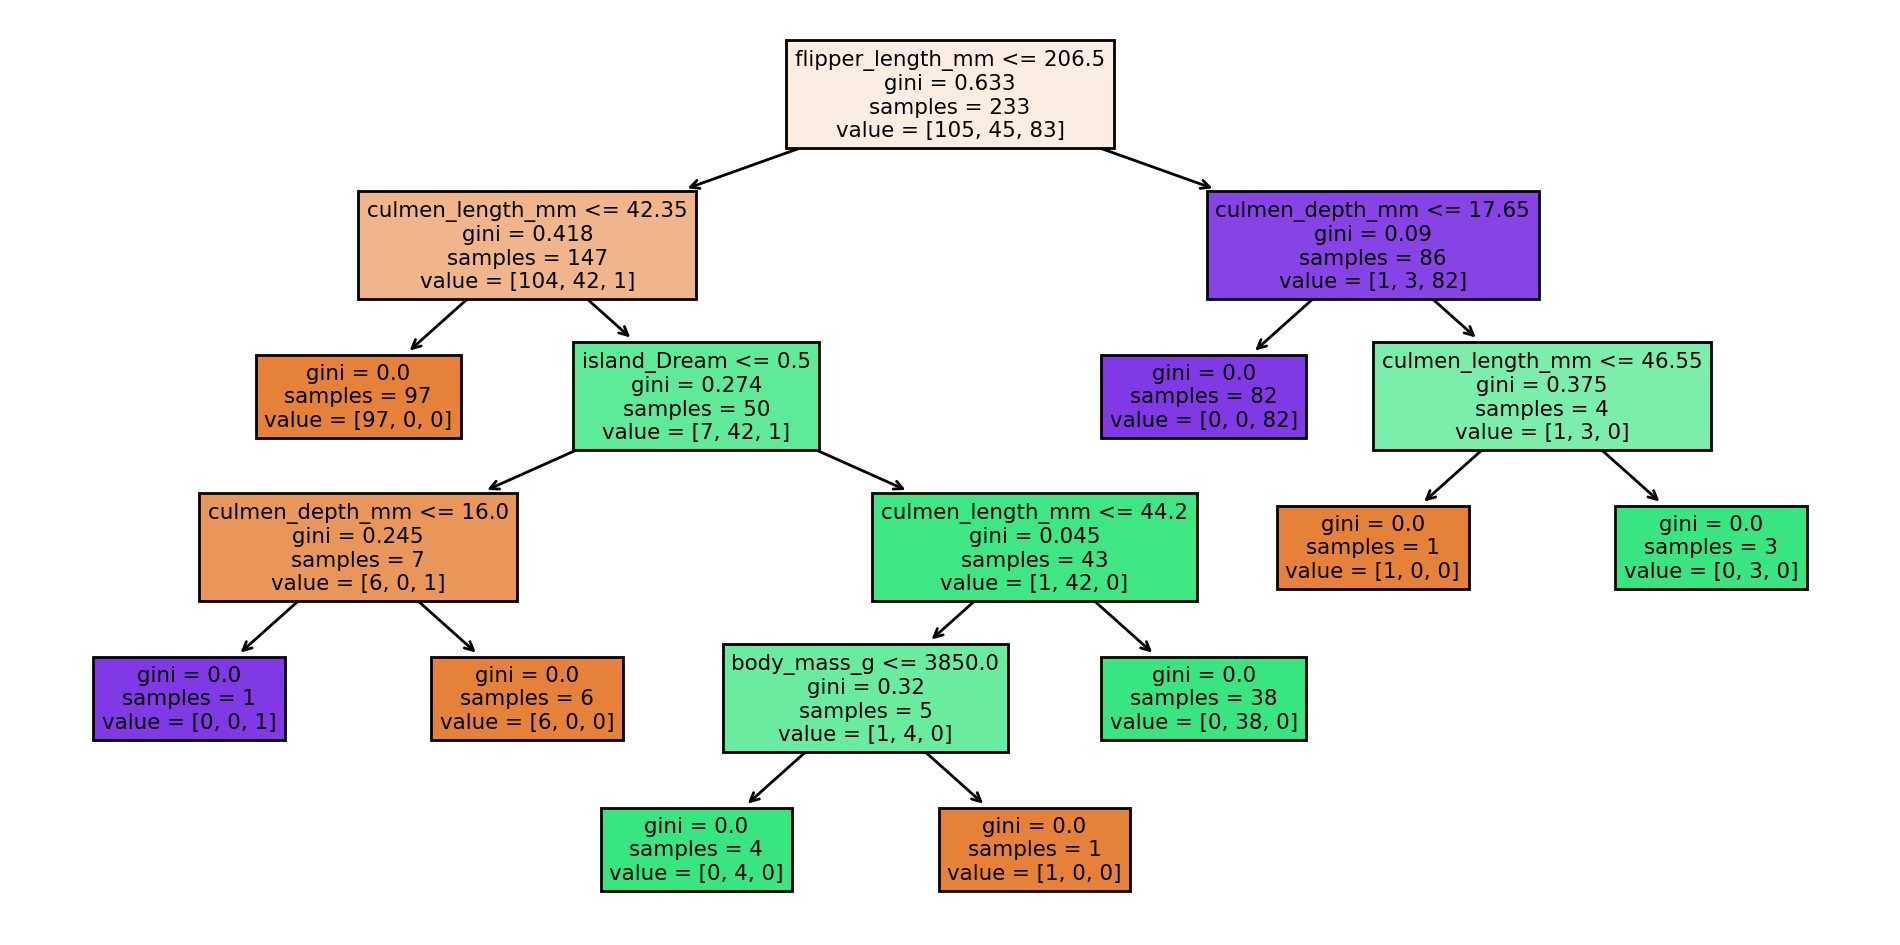

In [34]:
report_model(model)

In [35]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [36]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





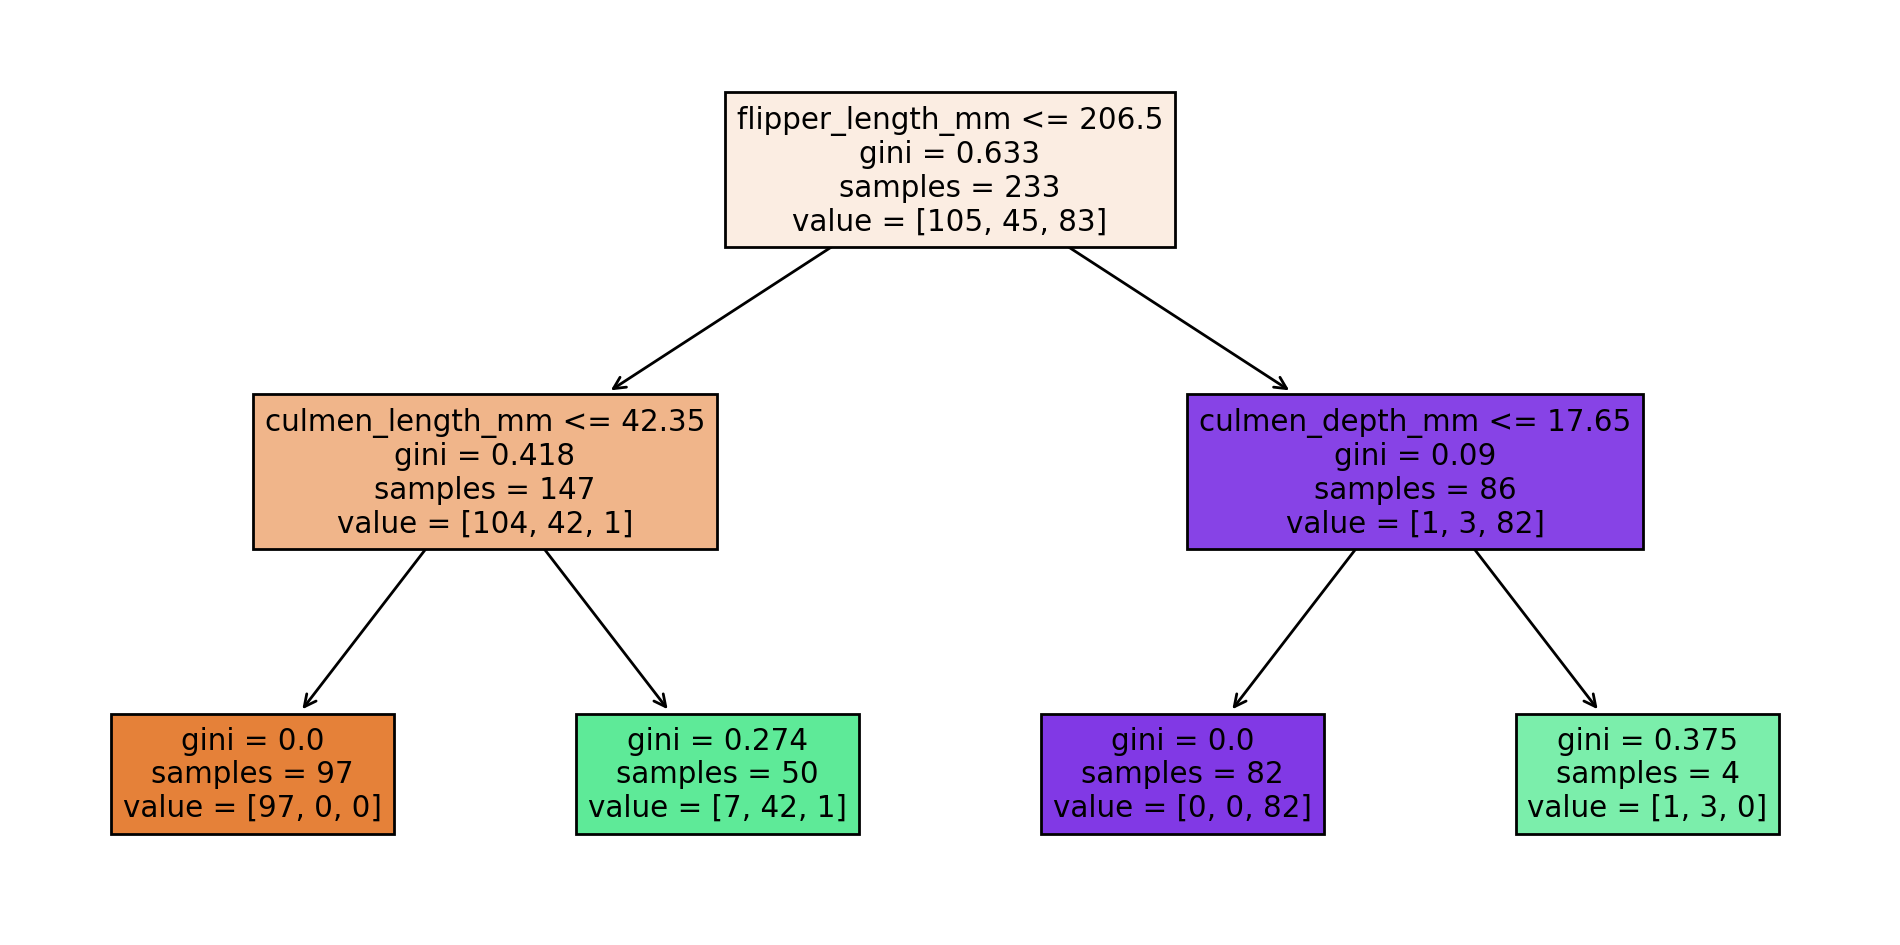

In [37]:
report_model(pruned_tree)

In [38]:
pruned_tree = DecisionTreeClassifier(max_depth=3)

In [39]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101





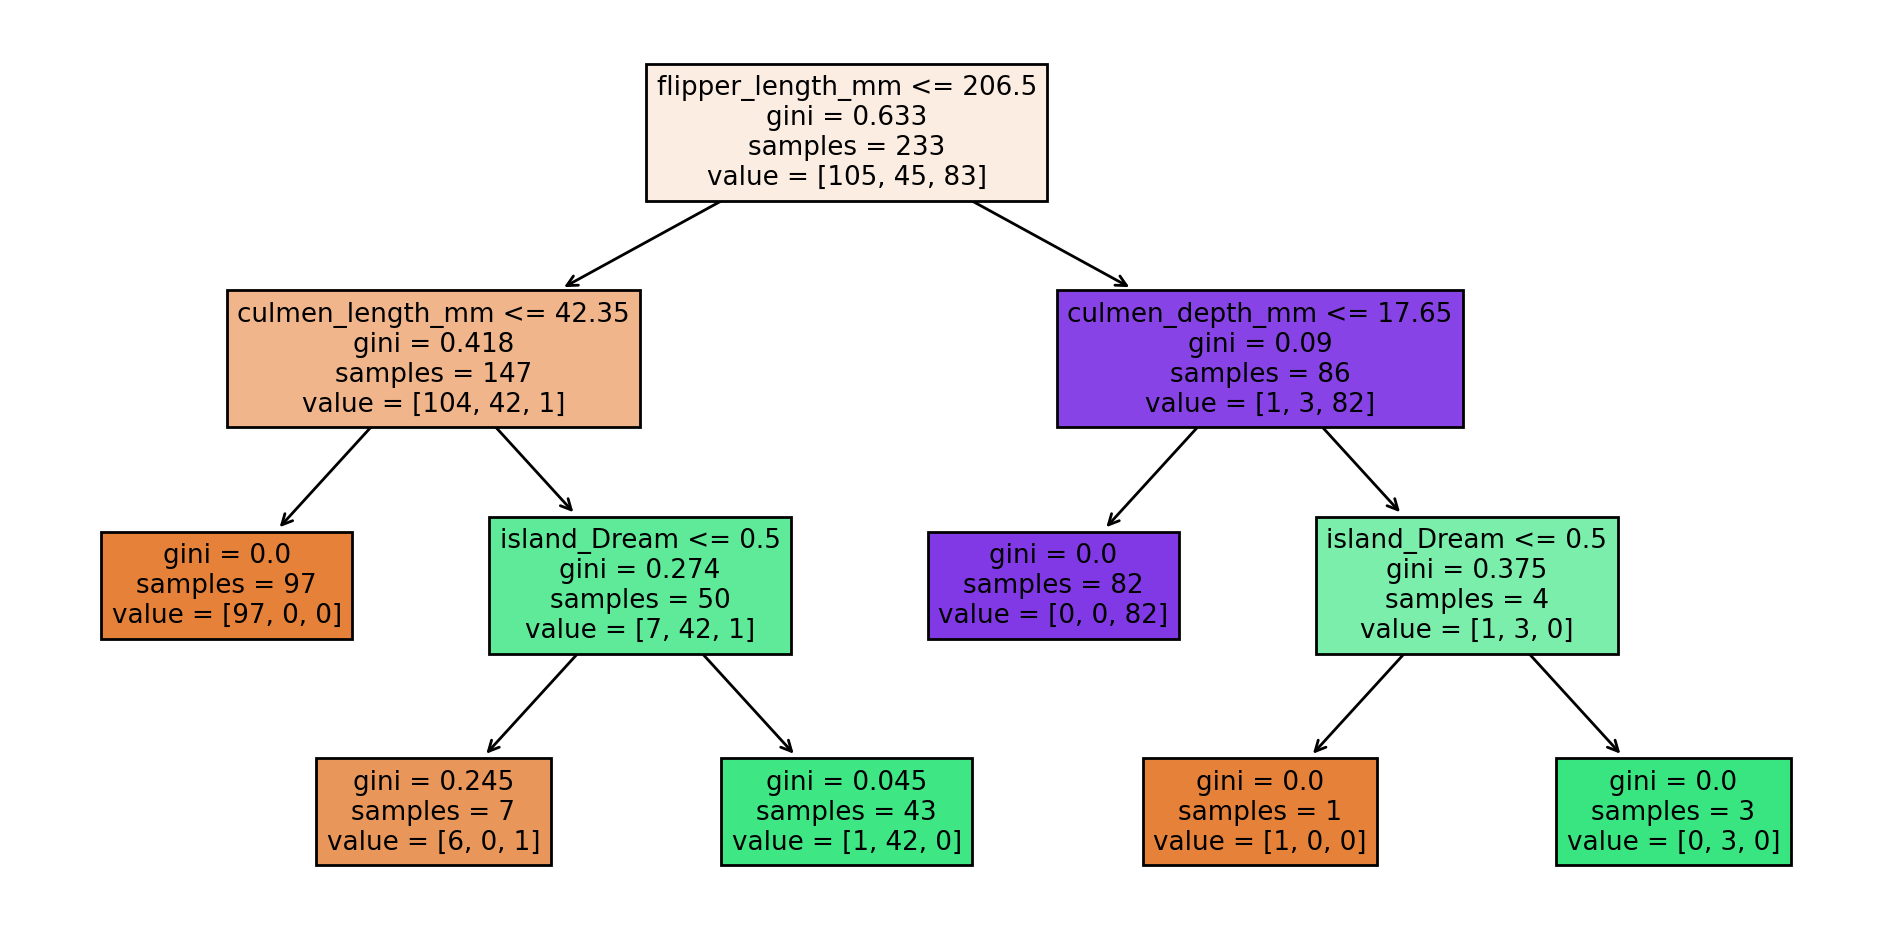

In [40]:
report_model(pruned_tree)

In [41]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)

In [42]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





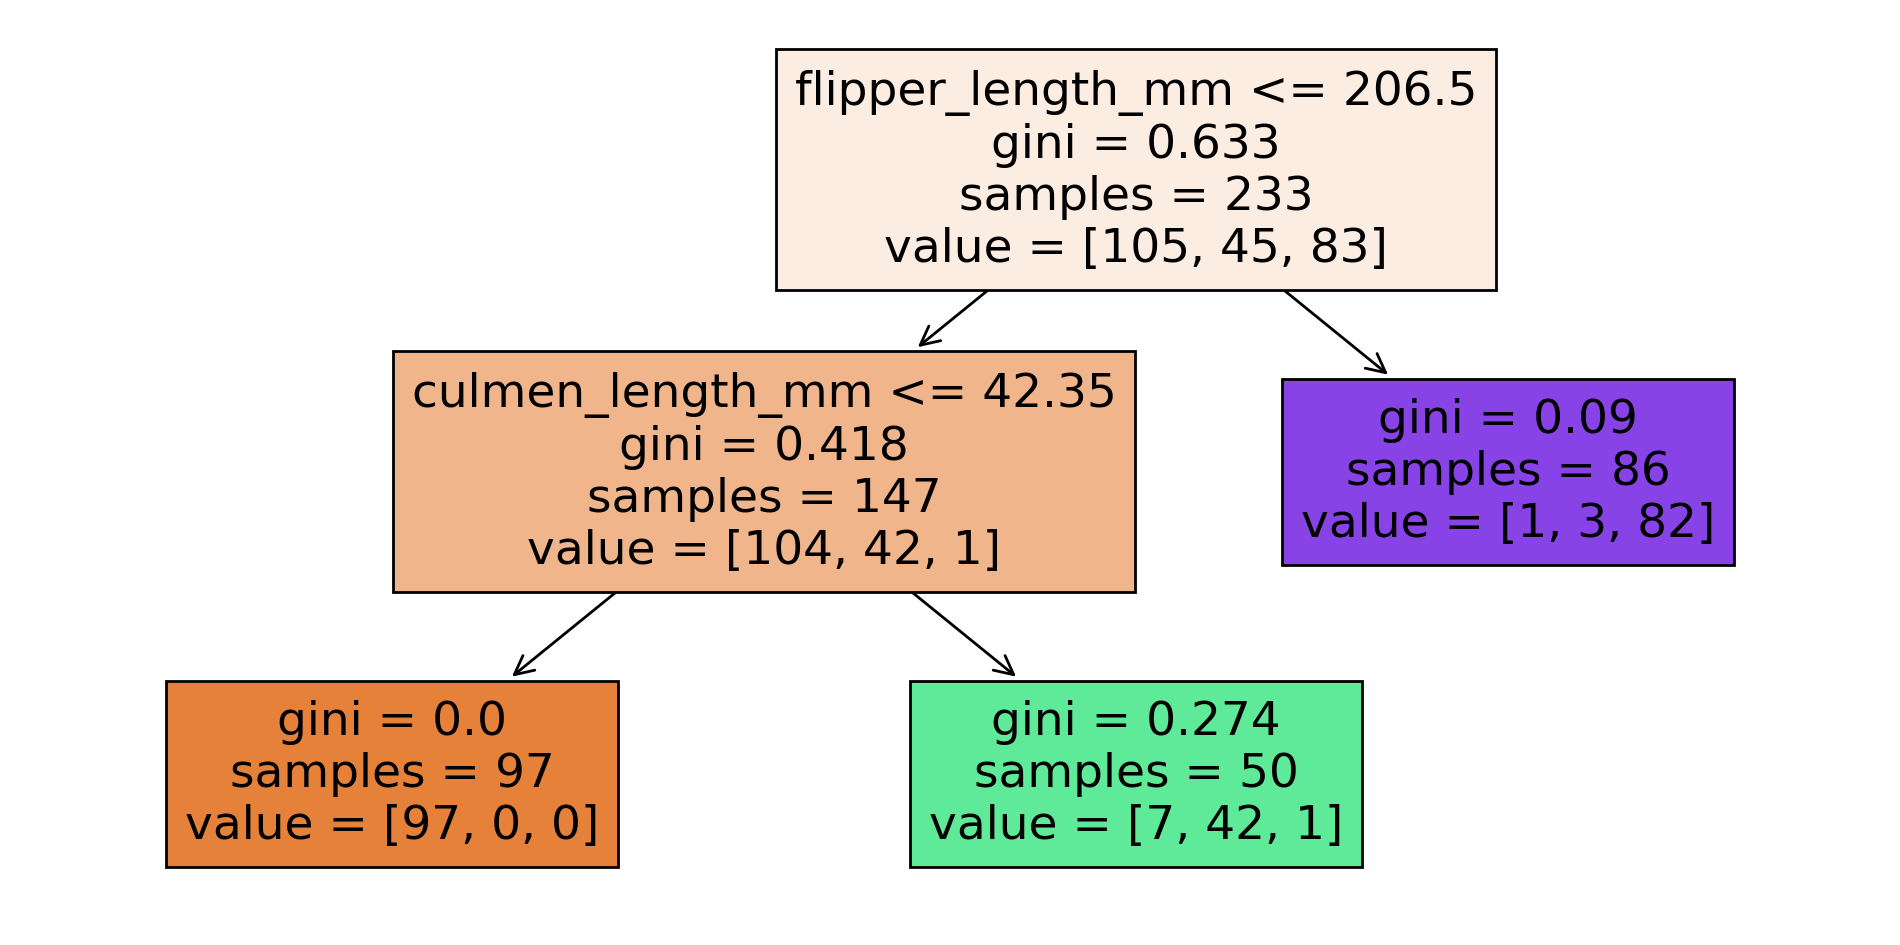

In [43]:
report_model(max_leaf_tree)

In [44]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [45]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.93      0.98      0.95        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.96      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101





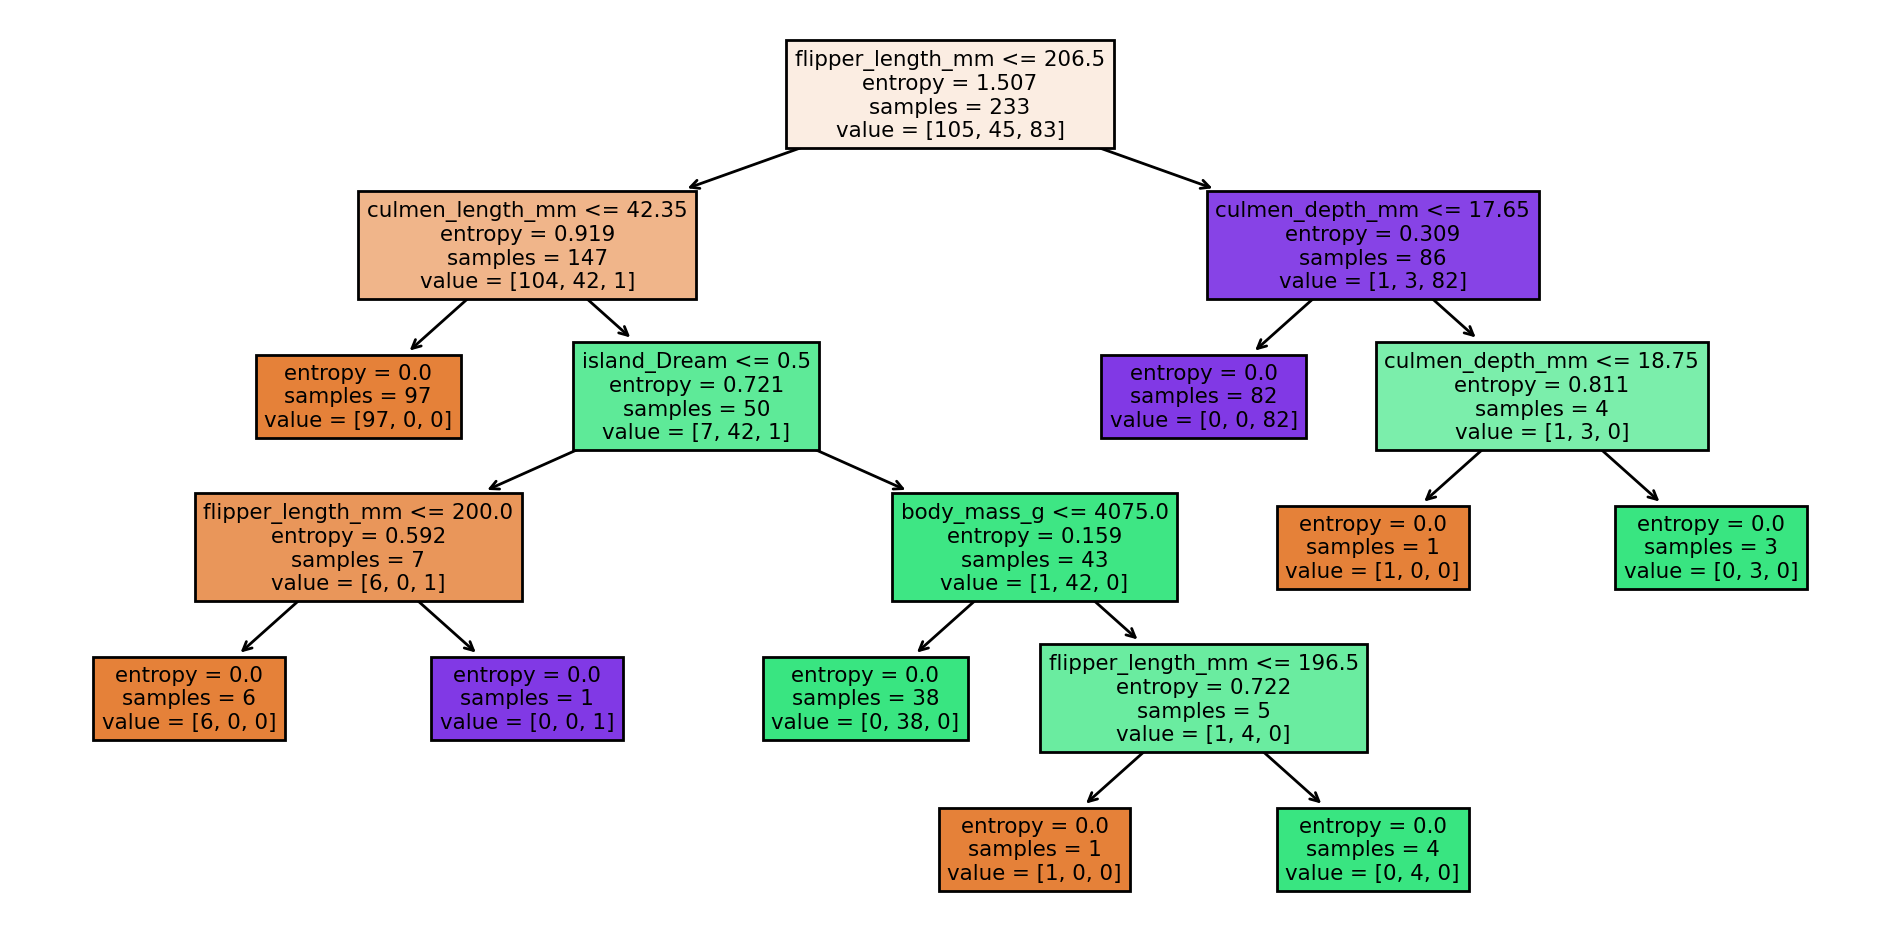

In [46]:
report_model(entropy_tree)